# 机器学习工程师纳米学位
## 强化学习
## 项目 4: 训练智能出租车学会驾驶

欢迎来到机器学习工程师纳米学位的第四个项目！在这个notebook文件中，模板代码已经提供给你，有助于你对*智能出租车*的分析和实现学习算法。你无须改动已包含的代码，除非另有要求。 你需要回答notebook文件中给出的与项目或可视化相关的问题。每一个你要回答的问题前都会冠以**'问题 X'**。仔细阅读每个问题，并在后面**'回答'**文本框内给出完整的回答。你提交的项目会根据你对于每个问题的回答以及提交的`agent.py`的实现来进行评分。 

>**提示：** Code 和 Markdown 单元格可通过 **Shift + Enter** 快捷键来执行。此外，Markdown可以通过双击进入编辑模式。

-----

## 开始
在这个项目中，你将构建一个优化的Q-Learning驾驶代理程序，它会操纵*智能出租车* 通过它的周边环境到达目的地。因为人们期望*智能出租车*要将乘客从一个地方载到另一个地方，驾驶代理程序会以两个非常重要的指标来评价：**安全性**和**可靠性**。驾驶代理程序在红灯亮时仍然让*智能出租车*行驶往目的地或者勉强避开事故会被认为是**不安全**的。类似的，驾驶代理程序频繁地不能适时地到达目的地会被认为**不可靠**。最大化驾驶代理程序的**安全性**和**可靠性**保证了*智能出租车*会在交通行业获得长期的地位。

**安全性**和**可靠性**用字母等级来评估，如下：

| 等级 	| 安全性 	| 可靠性 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	| 代理程序没有任何妨害交通的行为，<br/>并且总是能选择正确的行动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的100%。 |
|   A   	| 代理程序有很少的轻微妨害交通的行为，<br/>如绿灯时未能移动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的90%。 |
|   B   	| 代理程序频繁地有轻微妨害交通行为，<br/>如绿灯时未能移动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的80%。 |
|   C   	| 代理程序有至少一次重大的妨害交通行为，<br/>如闯红灯。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的70%。 |
|   D   	| 代理程序造成了至少一次轻微事故，<br/>如绿灯时在对面有车辆情况下左转。	| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的60%。 |
|   F   	| 代理程序造成了至少一次重大事故，<br/>如有交叉车流时闯红灯。	| 代理程序在合理时间内到达目的地的次数<br />未能达到行驶次数的60%。 |

为了协助评估这些重要的指标，你会需要加载可视化模块的代码，会在之后的项目中用到。运行下面的代码格来导入这个代码，你的分析中会需要它。

In [1]:
# 检查你的Python版本
from sys import version_info
if version_info.major != 2 and version_info.minor != 7:
    raise Exception('请使用Python 2.7来完成此项目')

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### 了解世界
在开始实现你的驾驶代理程序前，首先需要了解*智能出租车*和驾驶代理程序运行的这个世界（环境）。构建自我学习的代理程序重要的组成部分之一就是了解代理程序的特征，包括代理程序如何运作。原样直接运行`agent.py`代理程序的代码，不需要做任何额外的修改。让结果模拟运行一段时间，以观察各个不同的工作模块。注意在可视化模拟程序（如果启用了），**白色车辆**就是*智能出租车*。

### 问题 1
用几句话，描述在运行默认的`agent.py`代理程序中，你在模拟程序里观察到了什么。一些你可以考虑的情况：
- *在模拟过程中，智能出租车究竟移动了吗？*
- *驾驶代理程序获得了什么样的奖励？*
- *交通灯的颜色改变是如何影响奖励的？*

**提示：** 从顶层的`/smartcab/`目录（这个notebook所在的地方），运行命令
```bash
'python smartcab/agent.py'
```

**回答：**

1、未移动

2、红灯时获得范围在1~3之间的奖励；绿灯且无迎面车辆时获得-4~-6之间的奖励；绿灯且有迎面车辆时获得0~1之间的奖励。

3、未移动状态下，红灯有正奖励，大部分绿灯（无迎面车辆）有绝对值较大的负奖励

### 理解代码
除了要了解世界之外，还需要理解掌管世界、模拟程序等等如何运作的代码本身。如果一点也不去探索一下*“隐藏”*的器件，就试着去创建一个驾驶代理程序会很难。在顶层的`/smartcab/`的目录下，有两个文件夹：`/logs/` （之后会用到）和`/smartcab/`。打开`/smartcab/`文件夹，探索每个下面的Python文件，然后回答下面的问题。

### 问题 2
- *在*`agent.py`* Python文件里，选择 3 个可以设定的 flag，并描述他们如何改变模拟程序的。*
- *在*`environment.py`* Python文件里，当代理程序执行一个行动时，调用哪个Environment类的函数？*
- *在*`simulator.py`* Python 文件里，*`'render_text()'`*函数和*`'render()'`*函数之间的区别是什么?*
- *在*`planner.py`* Python文件里，*`'next_waypoint()`* 函数会先考虑南北方向还是东西方向?*

**回答：**

1、
- verbose 控制台中日志输出 小车位置、朝向、action、reward等其他详细信息
- Environment - num_dummies，环境中的小车数量
- Environment - grid_size，环境中交通路段的南北/东西向的道路数量

2、Environment.act()

3、
- render_text 总是执行，仅仅是作为一个日志输出，输出当前驾驶代理的状态、路口交通状态和所采取的行为；
- render 则是一个GUI渲染函数，调用pygame，将不仅仅是驾驶代理、而且包括其他小车、路段交通环境等都用GUI绘制出来

4、东西走向。代码中是`if dx == 0 and dy == 0:` => `elif dx != 0:` => `elif dy != 0:` 的逻辑，即是旨在先消灭dx，而消灭dx的话是需要在x轴方向移动，即东西走向

-----
## 实现一个基本的驾驶代理程序

创建一个优化Q-Learning的驾驶代理程序的第一步，是让代理程序确实地执行有效的行动。在这个情况下，一个有效的行动是`None`（不做任何行动）、`'Left'`（左转）、`'Right'`（右转）或者`'Forward'`（前进）。作为你的第一个实现，到`'choose_action()'`代理程序函数，使驾驶代理程序随机选择其中的一个动作。注意你会访问到几个类的成员变量，它们有助于你编写这个功能，比如`'self.learning'`和`'self.valid_actions'`。实现后，运行几次代理程序文件和模拟程序来确认你的驾驶代理程序每步都执行随机的动作。

### 基本代理程序模拟结果
要从最初的模拟程序获得结果，你需要调整下面的标志：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件。
- `'n_test'` - 将此标志设定为`'10'`则执行10次测试试验。

可选的，你还可以通过将`'display'`标志设定为`False`来禁用可视化模拟（可以使得试验跑得更快）。调试时，设定的标志会返回到他们的默认设定。重要的是要理解每个标志以及它们如何影响到模拟。

你成功完成了最初的模拟后（有20个训练试验和10个测试试验），运行下面的代码单元格来使结果可视化。注意运行同样的模拟时，日志文件会被覆写，所以留意被载入的日志文件！在 projects/smartcab 下运行 agent.py 文件。

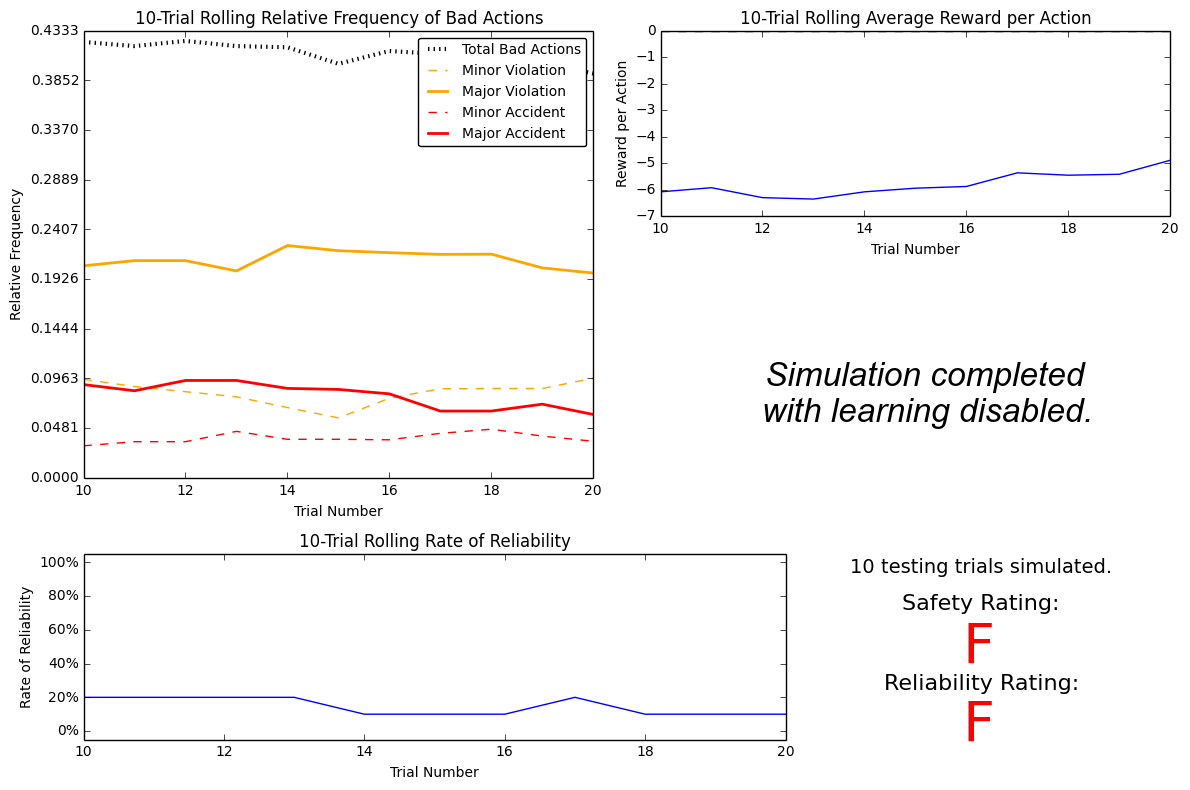

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### 问题 3
利用上面的从你初始模拟中得到的可视化结果，给出关于驾驶代理程序的分析和若干观察。确保对于可视化结果上的每个面板你至少给出一条观察结果。你可以考虑的一些情况：
- *驾驶代理程序多频繁地做出不良决策？有多少不良决策造成了事故？*
- *假定代理程序是随机驾驶，那么可靠率是否合理？*
- *代理程序对于它的行动会获得什么样的奖励？奖励是否表明了它收到严重的惩罚？*
- *随着试验数增加，结果输出是否有重大变化？*
- *这个智能出租车对于乘客来说，会被人为是安全的且/或可靠的吗？为什么或者为什么不？*

**答案：**

1、不良决策的频率大约在0.4左右，造成事故的频率占总决策0.1~0.15之间

2、可靠率基本在20%左右，数值很合理，决策非常不可靠。

3、每次训练的每一步的平均奖励都在-5~-6之间，同时根据日志可以看出闯红灯的奖励约-10、造成交通事故的奖励约-40，仅在等红灯等正确遵守交通规则时有较少的正奖励（因为deadline也会造成奖励减少），说明收到了严重惩罚。

4、不良策略和奖励值木有重大变化，可靠性稳定在20%。

5、不会。测试的安全/可靠性评分均为F，有车祸等安全性问题和无法准时抵达目的地的可靠性问题。

-----
## 通知驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第二步，是定义一系列代理程序会在环境中发生的状态。根据输入、感知数据和驾驶代理程序可用的变量，可以为代理程序定义一系列状态，使它最终可以*学习*在一个状态下它需要执行哪个动作。对于每个状态的`'如果这个处于这个状态就那个行动'`的状况称为**策略**，就是最终驾驶代理程序要学习的。没有定义状态，驾驶代理程序就不会明白哪个动作是最优的——或者甚至不会明白它要关注哪个环境变量和条件！

### 识别状态
查看`'build_state()'`代理程序函数，它显示驾驶代理函数可以从环境中获得下列数据：
- `'waypoint'`，*智能出租车*去向目的地应该行驶的方向，它是*智能出租车*车头方向的相对值。
- `'inputs'`，*智能出租车*的感知器数据。它包括  
  - `'light'`，交通灯颜色。
  - `'left'`，*智能出租车*左侧车辆的目的方向。如果没有车辆，则返回`None`。
  - `'right'`，*智能出租车*右侧车辆的目的方向。如果没有车辆，则返回`None`。
  - `'oncoming'`，*智能出租车*交叉方向车辆的目的方向。如果没有车辆，则返回`None`。
- `'deadline'`，*智能出租车*在时间之内到达目的地还所需的剩余动作数目。

### 问题 4
*代理程序的哪些可用特征与学习**安全性**和**效率**相关性最高？你为什么认为这些特征适合在环境中对**智能出租车**建模？如果你没有选择某些特征，放弃他们的原因是什么？*

**回答：**

waypoint和inputs。
- 根据RoutePlanner.next_waypoint的计算，waypoint显示的是抵达目的地的其中一种最优前进方向，这与效率、或者说可靠性相关。（PS:不过这个方向并没有考虑到红绿灯和出租车信息，同时也因为更倾向于东西走向的路段而存在导致宁可等待东西方向的红灯也不愿先通过南北走向的绿灯的可能性。）
- inputs的各个特征与与安全性相关。如果不考虑light，可能出现闯红灯；如果不考虑left/right/oncoming，可能会造成车祸。
- deadline用来约束效率。在deadline临近时，是否选择闯红灯以保证其效率就很值得考虑了。根据environment.py，`deadline = distance * 5`，因而我觉得初始deadline足够大；另外deadline的可取值太多，相对会造成维度过多，因而放弃该特征。


### 定义状态空间
当定义一系列代理程序会处于的状态，必需考虑状态空间的*大小*。就是说，如果你期望驾驶代理程序针对每个状态都学习一个**策略**，你会需要对于每一个代理状态都有一个最优的动作。如果所有可能状态的数量非常大，最后会变成这样的状况，驾驶代理程序对于某些状态学不到如何行动，会导致未学习过的决策。例如，考虑用下面的特征定义*智能出租车*的状态的情况：

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.
发生如`(False, True, True, True, False, False, '3AM')`的状态的频次如何？没有近乎无限数量的训练，很怀疑代理程序会学到一个合适的动作！

### 问题 5
*如果用你在**问题4**中选择的特征来定义一个状态，状态空间的大小是多少？假定你了解环境以及它是如何模拟的，你觉得经过合理数量的训练之后，代理驾驶能学到一个较好的策略吗？（遇见绝大部分状态都能作出正确决策。）*
**提示：** 考虑特征*组合*来计算状态的总数！

**回答：**
waypoint有4种值（left/right/forword/None）,light有2种(red/green) ,left有4种,right有4种, oncoming有4种

状态空间的大小:4\*2\*4\*4\*4 = 512

因为不论啥时候红灯，都可以右拐弯，所以这里去掉right；状态空间的大小:4\*2\*4\*4 = 128

在合理数量的训练后，可以学到一个较好的策略。

---

***二次作答***

waypoint有种值（left/right/forword）（根据RoutePlanner.next_waypoint，仅有`dx == 0 and dy == 0`时是None，此时即为终点，可忽略）,light有2种(red/green) ,left有4种（left/right/forword/None）, right有4种, oncoming有4种

3\*2\*4\*4\*4 = 384

but……

假设红灯情况

|x|x|路|x|x|
|:-:|:-:|:-:|:-:|:-:|
|x|x|路|x|x|
|路|他2|灯|他|路|
|x|x|我|x|x|
|x|x|路|x|x|

对于一个遵守交通规则的他车来说，红灯时（相对他车就是绿灯），他车的执行right/left/forward都不影响我车（因为我车在交规下只能右拐，而且是否真的能右拐还与我车的left也就是**他2车**是否直行有关）；

至于绿灯时（相对他车就是红灯），因为他车只能遵守交规选择右拐，而且他车的右拐还得看他车的left（就是我车）是否是直行，也无法影响我车。

**简单的说，DummyAgent.update内，`inputs['light']`没有对action_okay值造成任何影响**

因而这里，无论驾驶代理的`inputs['right']`值是什么，都不会影响驾驶代理学习到正确的交规

`inputs['right']`它所起作用的是在这段代码中
```python
        # Agent wants to drive forward:
        if action == 'forward':
            if light != 'green': # Running red light
                violation = 2 # Major violation
                if inputs['left'] == 'forward' or inputs['right'] == 'forward': # Cross traffic
                    violation = 4 # Accident
        
        # Agent wants to drive left:
        elif action == 'left':
            if light != 'green': # Running a red light
                violation = 2 # Major violation
                if inputs['left'] == 'forward' or inputs['right'] == 'forward': # Cross traffic
                    violation = 4 # Accident
                elif inputs['oncoming'] == 'right': # Oncoming car turning right
                    violation = 4 # Accident
            else: # Green light
                if inputs['oncoming'] == 'right' or inputs['oncoming'] == 'forward': # Incoming traffic
                    violation = 3 # Accident
                else: # Valid move!
                    heading = (heading[1], -heading[0])
```
即仅仅是作为定性是否仅仅是违反交规还是更进一步的造成事故。然而不论是违反交规还是造成事故，这个都是我们要规避的，只要最终能够遵守交规，那么就完全ok。

因而这里我认为，在这个题目所设置的简化交规环境下，如果我的目的是训练驾驶代理可以达到A以上，那么就可以去掉inputs.right

也就是 3\*2\*4\*4 = 96

因为特征组合有限，因而可以通过一定量的学习后得到一个较好的策略



---

***三次作答***

把“二次作答”中的inputs.right考虑进去，总计384。

### 更新驾驶代理程序的状态
要完成你的第二个实现，去到`'build_state()'`代理程序函数。根据你在**问题4**给出的判断，你现在要将`'state'`变量设定为包含所有Q-Learning所需特征的元组。确认你的驾驶代理程序通过运行代理程序文件和模拟会更新它的状态，注意状态是否显示了。如果用了可视化模拟，确认更新的状态和在模拟程序里看到的一致。

**注意：** 观察时记住重置模拟程序的标志到默认设定！

-----
## 实现Q-Learning驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第三步，是开始实现Q-Learning自身的功能。Q-Learning的概念相当直接：每个访问的状态，为所有可用的状态-行动配对在Q-table里创建一条记录。然后，当代理程序遇到一个状态并执行了一个动作，基于获得的奖励和设定的相互的更新规则，来更新关联的状态-动作配对的Q-value。当然，Q-Learning还带来其他的收益，如此我们可以让代理程序根据每个可能的状态-动作配对的Q-values，来为每个状态选择*最佳*动作。在这个项目里，你会实现一个*衰减* $\epsilon$ *-贪心* 的Q-learning算法，不含折扣因子。遵从每个代理程序函数的**TODO**下的实现指导。

注意代理程序的属性`self.Q`是一个字典：这就是Q-table的构成。每个状态是`self.Q`字典的键，每个值是另一个字典，包含了*action*和*Q-value*。这里是个样例：

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

此外，注意你要求利用一个*衰减*$\epsilon$*（探索）因子*。因此，随着试验的增加，$\epsilon$会向0减小。这是因为，代理程序会从它的行为中学习，然后根据习得的行为行动。而且当$\epsilon$达到特定阈值后（默认阈值为0.01），代理程序被以它所学到的东西来作检测。作为初始的Q-Learning实现，你将实现一个线性衰减$\epsilon$的函数。

### Q-Learning模拟结果
要从最初的Q-learning程序获得结果，你需要调整下面的标志和设置：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件，Q-table存为`.txt`文件。
- `'n_test'` - 将此标志设定为`'10'`则执行10次测试试验。
- `'learning'` - 将此标志设定为`'True'`来告诉驾驶代理使用你的Q-Learning实现。

此外，使用下面的$\epsilon$衰减函数：

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

如果你在实施时遇到困难，尝试把`'verbose'`标志设为`True`来调试。调试时，在这里设定的标志会返回到它们的默认设定。重要的是你要理解每个标志做什么并且解释它们怎么影响模拟！

当你成功完成初始的Q-Learning模拟程序后，运行下面代码单元格来使结果可视化。注意当相同的模拟运行时，log文件会被覆写，所以要留意载入的log文件！

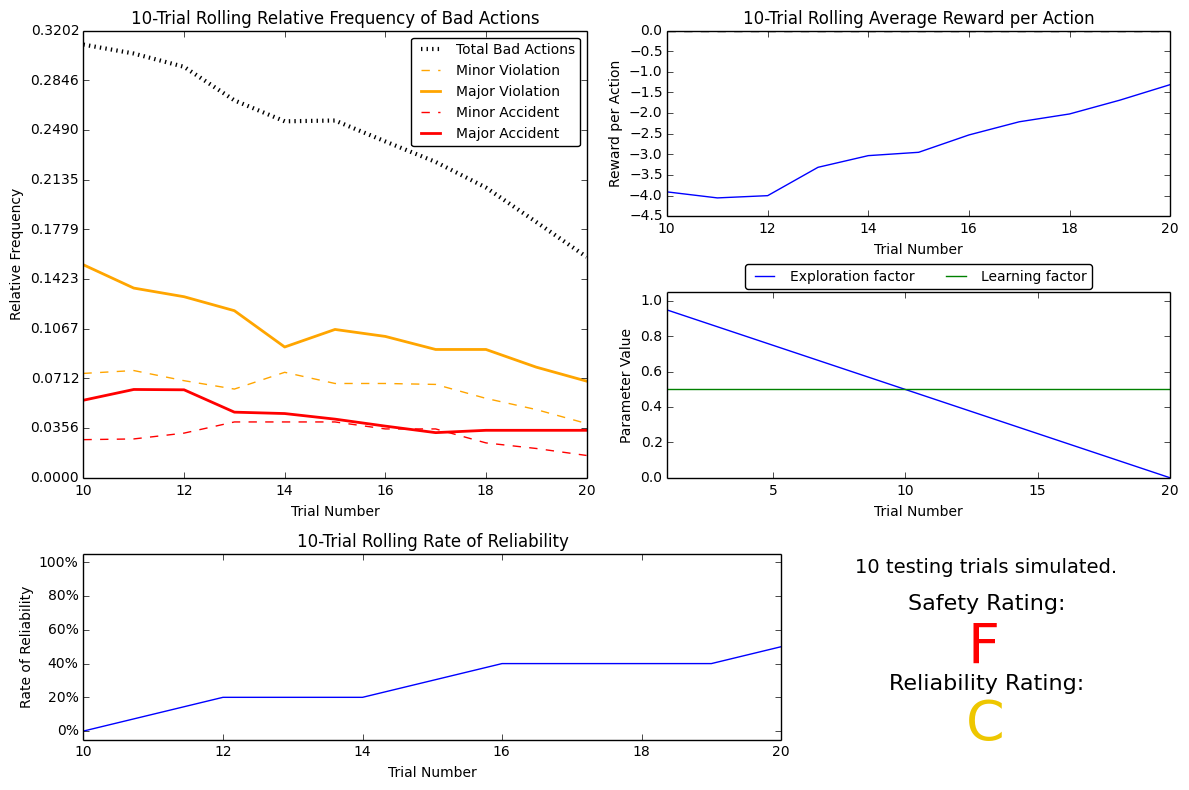

In [5]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### 问题 6
利用上面的从你默认的Q-Learning模拟中得到的可视化结果，像在**问题3**那样，给出关于驾驶代理程序的分析和若干观察。注意模拟程序应该也产生了Q-table存在一个文本文件中，可以帮到你观察代理程序的算法。你可以考虑的一些情况：
- *有没有观察到基本驾驶代理程序和默认的Q-Learning代理程序的相似之处？*
- *在测试之前驾驶代理大约需要做多少训练试验？在给定的$\epsilon$ 容忍度下，这个数字是否合理？*
- *你实现的$\epsilon$（探索因子）衰减函数是否准确地在参数面板中显示？*
- *随着试验数增加，不良动作的数目是否减少?平均奖励是否增加？*
- *与初始的驾驶代理程序相比，安全性和可靠性评分怎样？*

**回答：**

1、都会通过某种action造成事故；都因此受到了惩罚（负reward）；都不怎么可靠。

2、20次。tolerance为0.5，20次后epsilon从1减到了0，很合理。

3、是的。在第三张图中呈线性减小。

4、不良动作的数目减少，在第一张图中总的不良决策近似线性减少；平均奖励增加，在第二张图中也是近似线性上扬。

5、安全性依然是F，因为根据图1，学习到最后accident概率依然有近似0.1的概率，因而10次test中出现accident很正常；可靠性变为C了，这个应该是巧合，因为图4中可靠性概率基本在40%，要达到C有些困难；另外在重复实验中出现多次双F的情况。

---

***二次作答***

1、相似：在训练次数较少、随机性较高（epsilon较高）时，不良策略的概率都比较高（前者0.43不到，后者0.34左右）、都得到了较高的惩罚（前者均reward为-6，后者-4），可靠性都很低（20%和10%），安全性都很低（都F）；不同：可由图1、2、4看出，Q-learning的不良策略、reward、和可靠性概率都在随着训练次数的增加明显好转，而基本的驾驶代理并没有。

2、同上

3、同上

4、同上

5、又是一个F/C。安全性F很正常，因为图1中最后accident概率近似0.06，同时概率降低速度变缓，对应到10次测试中发生起码一次重大事故的可能性很高；图3中可靠性最后概率达到60%，如果让可靠性评分达到C（代理程序在合理时间内到达目的地的次数占行驶次数的70%），即只比最后一次训练可靠性高10%，在加上最后一次的训练成果，认为评分达到C很正常。这两个结果评分说明仍有重大安全隐患、同时路线策略仍有改进空间，仅凭20次训练完全无法达到我们想要的目的。

---

***三次作答***

1、(基本只是数值变动)：相似：在训练次数较少、随机性较高（epsilon较高）时，不良策略的概率都比较高（前者0.43不到，后者0.32左右）、都得到了较高的惩罚（前者均reward为-6，后者-4），可靠性都很低（20%和0%），安全性都很低（都F）；不同：可由图1、2、4看出，Q-learning的不良策略、reward、和可靠性概率都在随着训练次数的增加明显好转，而基本的驾驶代理并没有。

2、同上

3、同上

4、图1不良策略的降低速度较之前两次提交时稍减缓，其他同上。

5、依然是F/C……虽然增加了inputs.right，但就结果和答案而言，可以说是依然同上。

-----
## 改进Q-Learning驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第三步，是执行优化！现在Q-Learning算法已经实现并且驾驶代理程序已经成功学习了，需要调整设定、调节参数让驾驶代理程序学习**安全性**和**效率**。通常这一步需要很多试验和错误，因为某些设定必定会造成更糟糕的学习。要记住的一件事是学习的行为本身和需要的时间：理论上，我们可以允许代理程序用非常非常长的时间来学习；然而，Q-Learning另一个目的是*将没有习得行为的试验试验变为有习得行为的行动*。例如，训练中总让代理程序执行随机动作（如果$\epsilon = 1$并且永不衰减）当然可以使它*学习*，但是不会让它*行动*。当改进你的Q-Learning实现时，要考虑做一个特定的调整的意义，以及它是否逻辑上是否合理。

### 改进Q-Learning的模拟结果
要从最初的Q-learning程序获得结果，你需要调整下面的标志和设置：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件，Q-table存为`.txt`文件。
- `'learning'` - 将此标志设定为`'True'`来告诉驾驶代理使用你的Q-Learning实现。
- `'optimized'` - 将此标志设定为`'True'`来告诉驾驶代理你在执行一个优化版本的Q-Learning实现。

优化Q-Learning代理程序可以调整的额外的标志：
- `'n_test'` - 将此标志设定为某个正数（之前是10）来执行那么多次测试试验。
- `'alpha'` - 将此标志设定为0 - 1之间的实数来调整Q-Learning算法的学习率。
- `'epsilon'` - 将此标志设定为0 - 1之间的实数来调整Q-Learning算法的起始探索因子。
- `'tolerance'` - 将此标志设定为某个较小的大于0的值（默认是0.05）来设定测试的epsilon阈值。

此外，使用一个你选择的$\epsilon$ (探索因子)衰减函数。注意无论你用哪个函数，**一定要以合理的速率衰减**到`'tolerance'`。Q-Learning代理程序到此才可以开始测试。某个衰减函数的例子($t$是试验的数目)：

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$

如果你想的话，你也可以使用$\alpha$ （学习率） 的衰减函数，当然这通常比较少见。如果你这么做了，确保它满足不等式$0 \leq \alpha \leq 1$。
如果你在实施时遇到困难，尝试把`'verbose'`标志设为`True`来调试。调试时，在这里设定的标志会返回到它们的默认设定。重要的是你要理解每个标志做什么并且解释它们怎么影响模拟！

当你成功完成初始的Q-Learning模拟程序后，运行下面代码单元格来使结果可视化，请注意为了达到项目要求你需要在安全性和可靠性上获得至少都为A的评分。注意当相同的模拟运行时，log文件会被覆写，所以要留意载入的log文件！

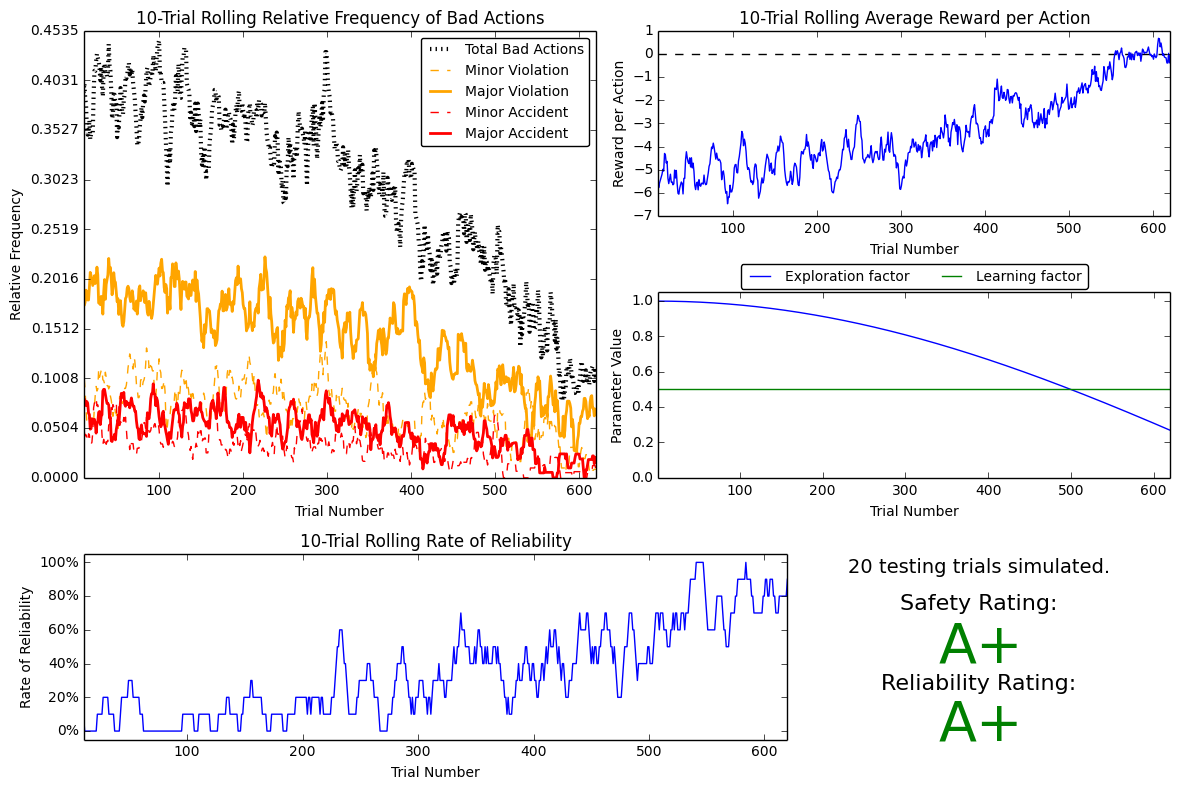

In [12]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### 问题7
利用上面的从你改进的Q-Learning模拟中得到的可视化结果，像在**问题6**那样，给出关于改进的驾驶代理程序的最终分析和观察。你需要回答的问题：
- *使用了什么epsilon（探索因子）的衰减函数？*
- *在测试之前驾驶代理大约需要做多少训练试验？*
- *你用了什么epsilon-tolerance和alpha（学习率）值？为什么？*
- *与之前的默认Q-Learning学习器相比，这个Q-Learning学习器有多少改进？ *
- *你会说Q-Learning学习器的结果表明了你的驾驶代理程序成功地学习了一个合适的策略吗？*
- *你对*智能出租车*的安全性和可靠性评分满意吗？*

**回答：**

1、$$ \epsilon = a^t, \textrm{for } a=0.99$$

2、350次左右。

3、`epsilon=1，tolerance=0.03，alpha=0.8`。epsilon取大值是为了通过随机性先将各种不良动作踩坑完。tolerance则是控制训练次数、以及让训练在最终能够遵循最优waypoint，避免safety过低。alpha过高会导致需完全复现起终点的路径和当时的交通状态才能抵达，过低则无法对后续学习产生效益。因为这里我有些强迫症，希望能够有较稳定的学习效果，因而我选了个稍稍偏大的数值0.8，同时为了满足学习效果，增加了训练次数。

4、增加训练次数和测试次数以增强该Q-learning的鲁棒性。训练到最后，在仍有tolerance=0.03概率的随机性下，不良决策的概率近乎0（图1）（相当于之前的0.2左右），可靠性则基本稳定在80%以上（图4）（相对于之前40%）。

5、是的，训练结果则是双A+，代表其策略相对还算优异。（实际上从我的`sim_improved-learning.txt`文件中看出，我的训练只测出了116种state，而实际上应该是128种，也就是说仍有未知状态未能在训练时遇到，因而该策略还存在些许盲点和隐患，需要增加epsilon值较大时的训练次数以覆盖所有可能）。

6、目前来看还算满意。

PS:根据多次调参运行，alpha值过低运行结果的随机性太强；epsilon在0.4以上（目测）的训练次数对可靠性影响较大，在0.4以下的训练次数对安全性影响较大。老师如果愿意，可以在我GitHub提交的历史记录里看一下这几个参数，基本上调整不大，但都可以较为稳定的得到一些A以上的评分。

----


***二次作答***

1、同上

2、同上

3、`epsilon=1，tolerance=0.03，alpha=0.8`。
```python
# When not learning, choose a random action
# When learning, choose a random action with 'epsilon' probability
#   Otherwise, choose an action with the highest Q-value for the current state
if not self.learning or self.epsilon > random.random():
    action = random.choice( self.valid_actions )
```
根据上述代码，epsilon越大，则随机性越高。epsilon初始值取大值是为了通过高随机性，将各种state情况都填充满。比如，我第一次训练时起点在(0,0)，目标在(2,2)，head面朝x轴正向，按照waypoint的走法是forward、forward、right、forward，这样我第一次训练只能训练到3次forward和1次right的情况；但如果我的随机性很高，那么我将不仅仅只走4步、只训练这4次的情况。

```python
if a.epsilon < tolerance: # assumes epsilon decays to 0
    testing = True
    trial = 1
```
因为我将训练次数调高了，可以从代码中看出来，tolerance是控制训练次数。同时因为epsilon最后会越来越小、越来越靠近tolerance以至最终低于tolerance，表明训练后期的随机性越来越小，从而让训练能够在遵循最优waypoint的情况下行动，避免safety过低。

```python
self.Q[state][action] = (1 - self.alpha) * self.Q[state][action] + self.alpha * reward
```
由这里的Q公式可得，alpha过高时将更依靠reward行事、而不重视历史数据，过低时则更依赖于历史数据而忽略当前reward数据。比如这里取极端值，0的情况下reward项将完全为0，历史Q值没有任何更新，即后续的学习完全没有任何效益。同理，alpha为1时则会完全覆盖历史Q值，训练多次的效果最终将只相当于训练最后1次。因为这里我的训练次数相对足够，并且因为我的epsilon越来越小、即越来越遵循waypoint，因而我选择了一个相对较大的值0.8，在保证历史数据仍有一定影响的情况下进行q-learning。


4、增加训练次数以使算法收敛，增加测试次数以增大方差，以判断算法是否收敛。训练到最后，在仍有tolerance=0.03概率的随机性下，不良决策的概率近乎0（图1）（相当于之前的0.2左右），可靠性则基本稳定在80%以上（图4）（相对于之前40%）。

5、是的，训练结果则是双A+，代表其策略相对还算优异。（`sim_improved-learning.txt`579行，去除前三行的注释内容，以及每6行对于一个完整的state,`(579-3)/6=96`，代表所有可能的state都已被遍历到）。

6、在当下所定义的环境下，以目前的安全性与可靠性评分来看，双A+代表没有任何交通妨碍、以及100%在时限内抵达目的地，因而相对还算满意。


---

***三次作答***

1、$$ \epsilon = \cos(at), \textrm{for } a = PI/1500 $$
这里换了衰减函数，因为这次增加了inputs.right，状态空间达到384，而对于每个state，都有4种action，达到1536种情况。为了能够尽可能的探索这些状态，epsilon相对维持在一个较高的值。

2、620。

3、与之前提交的有些不同。epsilon取1，目的依然是提高随机性；tolerance取0.27，这里主要是为了控制训练次数，由于epsilon相对较高、同时增加了训练次数，每次随机行动都有1/4的概率是waypoint的值，因而不用特别增加驾驶代理遵循waypoint的行动，即不用将tolerance降到特别低的值；alpha则调低到0.5。alpha没有进一步减少的原因如下。
```python
# Did the agent attempt a valid move?
if violation == 0:
    if action == agent.get_next_waypoint(): # Was it the correct action?
        reward += 2 - penalty # (2, 1)
    elif action == None and light != 'green': # Was the agent stuck at a red light?
        reward += 2 - penalty # (2, 1)
    else: # Valid but incorrect
        reward += 1 - penalty # (1, 0)
```
仅拿非不良行为的奖励部分看，结合Q值的公式，对于指定的S/A，Q(S/A)在第一次训练时的值是`(1-α)*0 + α*R`，不闯红灯/方向正确的Q值取值范围(0,2α)，二次训练后取值范围则是(0,2)；方向不正确的Q值则分别是(0,α)、(0,1)。因而如果存在Q(S/A)训练了1次、Q(S/A')训练了两次，很有可能会出现Q(S/A)≈2α、Q(S/A')≈1这样的局面，在α\<0.5时极容易出现方向不正确的Q值比方向正确的Q值大的情况，因而取值应该大于等于0.5。alpha不能取值过大的原因则同上次作答。

尝试alpha=0.5，发现结果还不错，于是选择保留了这个值。

4、增加训练次数以使算法收敛，增加测试次数以增大方差，以判断算法是否收敛。训练到最后，在最后tolerance=0.27概率的随机性下，不良决策的概率近乎0（图1）（相当于之前的0.2左右），可靠性则基本稳定在80%以上（图4）（相对于之前40%）。

('forward', 'green', 'right', None, 'right')
 -- forward : 1.61
 -- left : -9.61
 -- right : 0.00
 -- None : 0.00

### 定义一个最优策略

有时，对于重要的问题*“我要让我的代理程序学习什么？”*的答案，只是理论性的，无法具体描述。然而这里，你可以具体定义代理程序要学什么，就是美国通行权交通法案。这些法律是已知信息，你可以基于这些法律，为*智能出租车*进一步定义每一个状态所做的最优动作。在那种情况下，我们称这一系列最优状态-动作配对为**最优策略**。因此，不像那些理论性的回答，不仅通过收到的奖励（惩罚），而且纯观察，代理程序是否在“错误”地行动能很清晰地得知。如果代理程序闯了红灯，我们既看见它获得了一个负面奖励，也知道这是一个错误的行为。这可以用来帮你验证驾驶代理程序习得的**策略**是否正确，或只是个**次优策略**。

### 问题 8
给出几个关于最优策略是什么样子的例子（用你已定义的状态）。之后，查看`'sim_improved-learning.txt'`文本文件，看你的改进的Q-Learning算法的结果。_每个从模拟中纪录的状态，对于给定的状态，**策略**（得分最高的动作）是否正确？是否对于有些状态，有策略不同于预期的最优策略？_给出一个状态和记录的状态-动作的奖励，解释为什么正是个正确的策略。

**回答：** 

最优策略的例子：

|waypoint|light|left|oncoming|
|:-:|:-:|:-:|:-:|
|None|red|right|None|
|forward|green|None|None|
|right|red|None|right|

并不是所有策略都正确，存在一些策略不同于预期。

>('right', 'red', None, 'right')<br>
 -- forward : -9.47<br>
 -- None : 1.86<br>
 -- right : 1.10<br>
 -- left : -39.61<br>
 
这里预期最优应该是与waypoint一致的right，但实际上None的reward更高，应该是因为在epsilon前期造成了大量的accident，其惩罚过高，同时代理程序在遇到的大量light为red、action为None都有正reward，让策略在学习过程中遇到红灯时更倾向于None。因此，虽然waypoint为right且right的reward为正，但该情况的次数较少，没能在Q迭代过程中占据主导地位。

PS:`给出一个状态和记录的状态-动作的奖励，解释为什么正是个正确的策略。`这句话应该是`解释为什么不是个正确的策略`吧？

---

***二次作答***

最优策略例子

|waypoint|light|left|oncoming|action|
|:-:|:-:|:-:|:-:|:-:|
|left/forward|red|left/forward/right|None/right|None|
|right|red|forward|None/right|None|
|right|red|left/right|None/right|right|
|right|green|None/right|left/right/forward| right |
|forward|green|None/right|left/right/forward| forward |
|left|green|None/right|forward| right/forward (这里为了避免None造成交通拥堵) |
|left|green|None/right|left/right| left |

对于给定的状态，策略基本正确，少部分策略不同于预期的最优策略
>('right', 'red', 'right', 'left')<br>
 -- forward : -32.43<br>
 -- None : 1.72<br>
 -- right : 1.34<br>
 -- left : -10.02<br>
 
> ('right', 'red', 'right', None)<br>
 -- forward : -10.14<br>
 -- None : 2.28<br>
 -- right : 0.49<br>
 -- left : -9.92<br>

按照最优策略，这两种情况下都应该选择right，因为选择right是采取跟waypoint一样的策略，更接近目的地，但是实际上right的值为1.34/0.49，比None的1.72/2.28要小。

造成这种情况原因有以下可能（代码为Environment.act的代码）：
```python 
# ......

# Reward scheme
# First initialize reward uniformly random from [-1, 1]
reward = 2 * random.random() - 1

# ......

# Did the agent attempt a valid move?
if violation == 0:
    if action == agent.get_next_waypoint(): # Was it the correct action?
        reward += 2 - penalty # (2, 1)
    elif action == None and light != 'green': # Was the agent stuck at a red light?
        reward += 2 - penalty # (2, 1)
    else: # Valid but incorrect
        reward += 1 - penalty # (1, 0)
```
在第一段代码中reward采取的随机reward，可能导致None的reward高于right；在第二段代码中可以看出，在同样是正确的策略下，算法在对waypoint和action都为right时，与红灯下action为None时，提供的额外reward是一样的。因而可以理解为，算法中的随机性、以及算法本身所带有的‘红灯停’的倾向，会导致这种情况产生。

当然，尽管上述两个属于非最优策略，但它们依然是正确的策略。它们都选择的了红灯时停下，而红灯停既不造成交通阻塞也不会造成事故。

导师在第一次给出的意见是 *这里的优化的建议是你可以增加训练次数，让智能车“见多识广”！* ，不过我认为这里应该从代码层面修改，仅凭增加训练次数应该无法抹平这里的问题。

-----
### 选做：未来奖励 - 折扣因子 `'gamma'`
也许你会好奇，作为Q-Learning算法的一部分，之前要求你在实现中**不要**使用折扣引子`'gamma'`。在算法中包含未来奖励能有助于在未来状态回溯到当前状态时的反向正面奖励。本质上，如果给予驾驶代理程序执行若干动作到达不同状态的选择，包含未来奖励会是代理程序偏向可以得到更多奖励的状态。一个例子是驶向目的的驾驶代理程序：所有行动和奖励都相等，那么理论上如果到达目的地会有额外奖励，驶向目的会获得更好的奖励。然而，即使在这个项目里，驾驶代理程序也要在规定的时间里到达目的地，包含未来奖励不会有益于代理程序。实际上，如果代理程序给予多次试验学习，它甚至会给Q-value带来负面影响！

### 可选问题 9
*在项目中有两个特点使得未来奖励在这个Q-Learning算法无效。一个特点是关于*智能出租车*本身，另一个是关于环境。你能指出它们是什么以及为什么未来奖励不会在这个项目中起效？*

**回答：**

智能出租车（驾驶代理）的问题是无法获得nextState的reward。因为题设是只知道当前路口的情况，下一个路口的红绿灯和下一个路口的汽车，他们的state都是未知的，下下个路口同样也是如此。我们无法提前得知当我们下一个state、下下一个state是怎样的，也就无法提前得知我们会具体获得怎样确凿的reward。也许当我们决定绕远路以谋求未来奖励时，却发现未来奖励突然就变成了未来惩罚。

环境的问题是因为每次起终点都是随机的，那么起终点之间的有效路径就是不确定的了，在这种情况下，无法确定每次训练怎样的路线是最短路线、怎样的路线是绕远路以谋取未来奖励。除非这里是固定的起终点（比如都是从(0,0)到(5,5)），这样才能把路线和起终点联系起来，才能在迭代中对对比判断出远路B是否比近路A的未来奖励更大。

----

***二次作答***

智能出租车的问题是无法感知非当前路口的环境。因为有折扣因子gamma的Q-learning是这样的

Q(S,A) ← (1-α)*Q(S,A) + α*[R + γ*maxQ(S',a)]

对于maxQ(S',a)来说，因为我们无法感知下一个路口的状况（即是否在下一刻绿灯转红灯、是否有oncoming突然直行导致无法按照预想left等等）因而S'是未知的，同样对于这个不确定的S'来说，maxQ(S',a)也将不确定。

环境的问题同上。

> **注意**:当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)**把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。